<a href="https://colab.research.google.com/github/thapaprogress/Db-documentation/blob/master/PCAimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error loading .npy file: Failed to interpret file '/content/olivetti_faces.npy' as a pickle
Loading dataset from sklearn...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


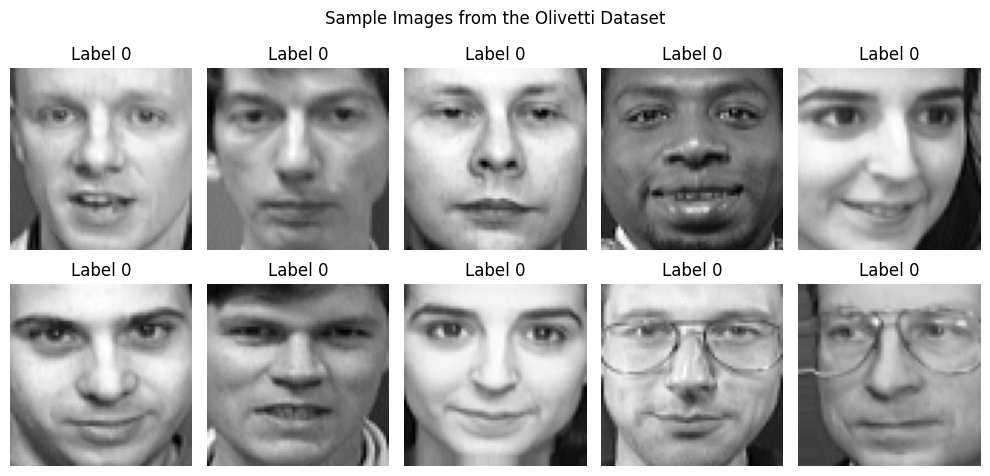

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import seaborn as sns

# Step 1: Load the Olivetti Faces Dataset

try:
    # Attempt to load the dataset from local .npy file
    dataset_path = '/content/olivetti_faces.npy'
    olivetti_faces = np.load(dataset_path, allow_pickle=True)
    print("Loaded Olivetti faces dataset from local .npy file.")
except Exception as e:
    # If there's an error, use the built-in dataset from sklearn
    print(f"Error loading .npy file: {e}")
    print("Loading dataset from sklearn...")
    olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42).images

# Define variables
n_samples, height, width = olivetti_faces.shape
X = olivetti_faces.reshape((n_samples, height * width))  # Flatten the images

# Generate synthetic labels (0-39) for demonstration purposes
y = np.repeat(np.arange(40), 10)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display sample images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(olivetti_faces[i], cmap=plt.cm.gray)
    plt.title(f"Label {y[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from the Olivetti Dataset")
plt.tight_layout()
plt.show()


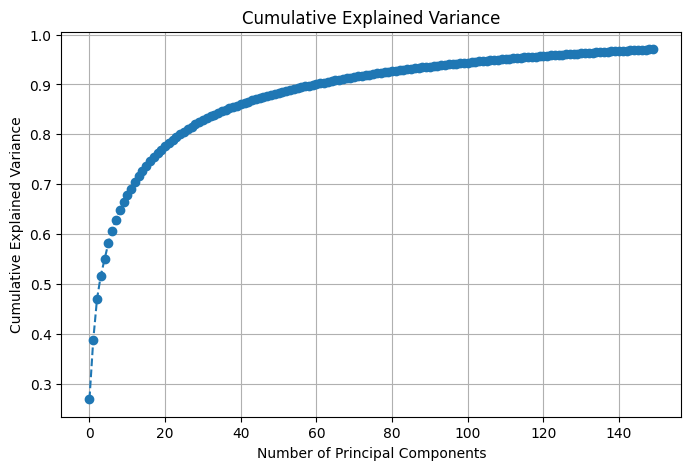

In [ ]:
# Step 2: Apply PCA for Dimensionality Reduction

# Number of principal components to retain
n_components = 150
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the cumulative explained variance to understand the information retained
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [ ]:
# Step 3: Train an SVM Classifier

# Train an SVM classifier on the PCA-transformed data
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:

# Predict on the test set
y_pred = svm_classifier.predict(X_test_pca)

In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy:.2f}")

Accuracy of SVM classifier: 0.01


In [ ]:
# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.50      0.33      0.40         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

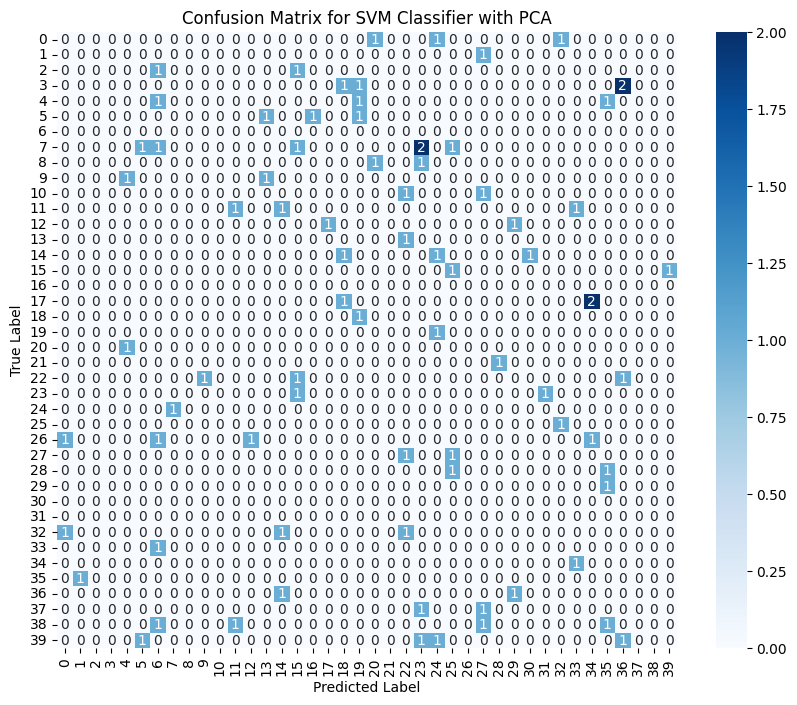

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier with PCA')
plt.show()

In [ ]:
# Step 4: Save and Load the PCA Model

# Save the trained PCA model
model_path = '/content/olivetti_faces.npy'
joblib.dump(pca, model_path)
print(f"PCA model saved to {model_path}")


PCA model saved to /content/olivetti_faces.npy


In [ ]:
# Load the saved PCA model
loaded_pca = joblib.load(model_path)

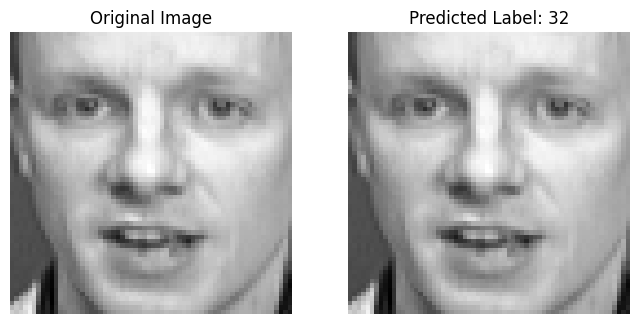

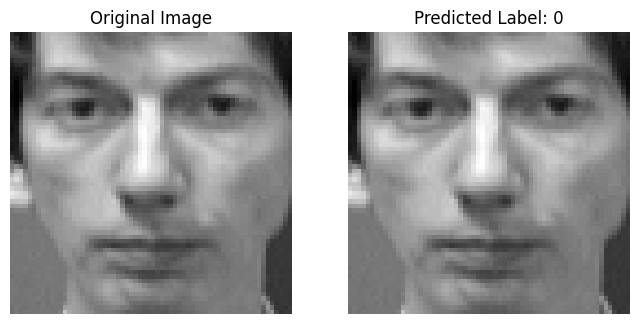

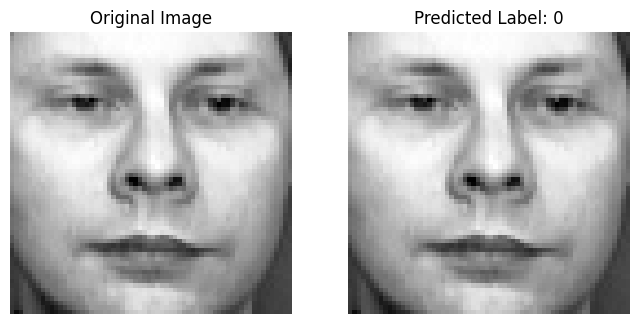

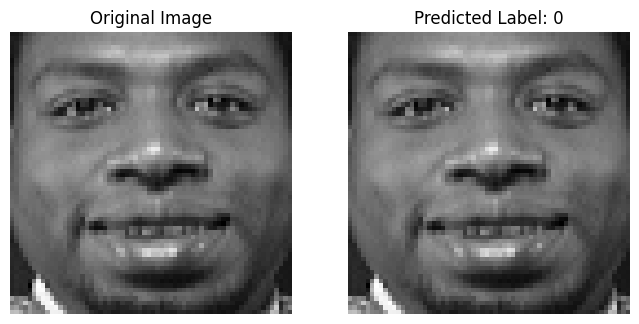

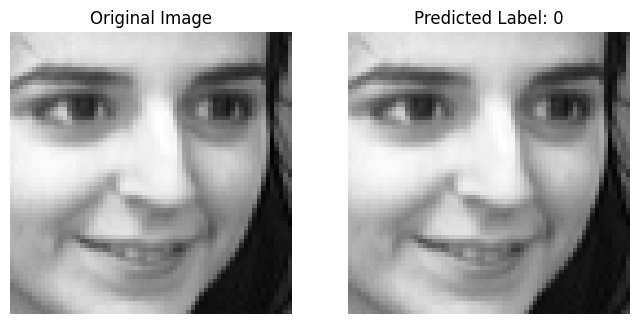

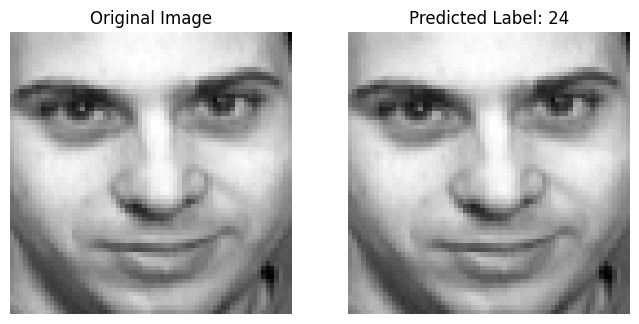

In [ ]:
# recognize_image function
def recognize_image(image_index):
    # Original image
    original_image = olivetti_faces[image_index]
    plt.figure(figsize=(8, 4))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap=plt.cm.gray)
    plt.title("Original Image")
    plt.axis('off')

    # Transform and predict using PCA and SVM
    image_data = X_scaled[image_index].reshape(1, -1)  # Reshape for single sample
    image_pca = loaded_pca.transform(image_data)  # PCA transformation
    predicted_label = svm_classifier.predict(image_pca)  # Predict label

    # Display prediction result
    plt.subplot(1, 2, 2)
    plt.imshow(original_image, cmap=plt.cm.gray)
    plt.title(f"Predicted Label: {predicted_label[0]}")
    plt.axis('off')
    plt.show()

# Recognize and predict a few sample images
for i in range(6):  # Display 6 samples
    recognize_image(i)  # Predict and display the results for the first 6 images


# a human interface that allows users to interact with the Olivetti faces dataset and recognize faces, we'll use a basic GUI (Graphical User Interface) using tkinter. The program will allow users to select an image from the dataset, display it, and predict the corresponding label using PCA and an SVM classifier.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from PIL import Image, ImageTk

# Step 1: Load and Prepare the Dataset

# Load the Olivetti faces dataset from sklearn
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42).images

# Define variables
n_samples, height, width = olivetti_faces.shape
X = olivetti_faces.reshape((n_samples, height * width))  # Flatten the images

# Generate synthetic labels (0-39) for demonstration purposes
y = np.repeat(np.arange(40), 10)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Apply PCA for Dimensionality Reduction

n_components = 150  # Number of principal components to retain
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Train an SVM Classifier

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_pca, y_train)

# Predict on the test set to evaluate performance
y_pred = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy:.2f}")

# Step 4: Create the GUI using tkinter

class FaceRecognitionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Face Recognition System")
        self.root.geometry("400x400")

        # Create a label to display instructions
        self.instruction_label = ttk.Label(root, text="Select an image index (0-399) to recognize:")
        self.instruction_label.pack(pady=10)

        # Create an entry widget to take user input
        self.index_entry = ttk.Entry(root, width=10)
        self.index_entry.pack(pady=5)

        # Create a button to trigger the recognition process
        self.recognize_button = ttk.Button(root, text="Recognize", command=self.recognize_face)
        self.recognize_button.pack(pady=10)

        # Create a label to display the result
        self.result_label = ttk.Label(root, text="", font=("Arial", 12))
        self.result_label.pack(pady=10)

        # Create a label to display the image
        self.image_label = tk.Label(root)
        self.image_label.pack(pady=10)

    def recognize_face(self):
        # Get the index entered by the user
        index = self.index_entry.get()

        try:
            # Convert the index to integer and validate
            index = int(index)
            if index < 0 or index >= n_samples:
                raise ValueError("Index out of range")

            # Display the selected image
            image_array = olivetti_faces[index]
            self.display_image(image_array)

            # Transform the image using PCA and predict using SVM
            image_data = X_scaled[index].reshape(1, -1)  # Reshape for single sample
            image_pca = pca.transform(image_data)  # PCA transformation
            predicted_label = svm_classifier.predict(image_pca)  # Predict label

            # Display the result
            self.result_label.config(text=f"Predicted Label: {predicted_label[0]}")

        except ValueError:
            messagebox.showerror("Invalid Input", "Please enter a valid index between 0 and 399.")

    def display_image(self, image_array):
        # Convert the image array to a PIL image
        image = Image.fromarray((image_array * 255).astype('uint8'))
        image = image.resize((100, 100), Image.ANTIALIAS)  # Resize for display
        image_tk = ImageTk.PhotoImage(image)

        # Display the image on the label
        self.image_label.config(image=image_tk)
        self.image_label.image = image_tk  # Keep a reference to avoid garbage collection

# Create the main window
root = tk.Tk()

# Create an instance of the FaceRecognitionApp
app = FaceRecognitionApp(root)

# Run the main loop
root.mainloop()


Accuracy of SVM classifier: 0.01


TclError: no display name and no $DISPLAY environment variable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
from PIL import Image, ImageTk, ImageOps
import joblib
from scipy.spatial.distance import euclidean

# Step 1: Load and Prepare the Dataset

# Load the Olivetti faces dataset
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42).images

# Define variables
n_samples, height, width = olivetti_faces.shape
X = olivetti_faces.reshape((n_samples, height * width))  # Flatten the images

# Generate synthetic labels (0-39) for demonstration purposes
y = np.repeat(np.arange(40), 10)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA for Dimensionality Reduction

n_components = 150  # Number of principal components to retain
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Save the PCA model for future use
model_path_pca = 'pca_model.pkl'
joblib.dump(pca, model_path_pca)

# Step 4: Create the GUI for Image Upload and Matching

class FaceRecognitionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Face Recognition System")
        self.root.geometry("600x700")

        # Load the trained PCA model
        self.pca_model = joblib.load(model_path_pca)

        # GUI components
        self.upload_button = ttk.Button(root, text="Upload Image", command=self.upload_image)
        self.upload_button.pack(pady=20)

        self.image_label = tk.Label(root)
        self.image_label.pack(pady=10)

        self.match_button = ttk.Button(root, text="Find Best Matches", command=self.find_best_matches)
        self.match_button.pack(pady=10)

        self.result_label = ttk.Label(root, text="", font=("Arial", 12))
        self.result_label.pack(pady=10)

        self.match_images_frame = tk.Frame(root)
        self.match_images_frame.pack(pady=10)

        self.uploaded_image = None
        self.processed_image = None

    def upload_image(self):
        # File dialog to upload an image
        file_path = filedialog.askopenfilename()
        if file_path:
            try:
                # Open and display the image
                image = Image.open(file_path)
                image = ImageOps.grayscale(image)  # Convert to grayscale
                image = image.resize((width, height), Image.Resampling.LANCZOS)  # Resize to 64x64 using LANCZOS

                # Display the uploaded image
                self.uploaded_image = image
                image_tk = ImageTk.PhotoImage(image)
                self.image_label.config(image=image_tk)
                self.image_label.image = image_tk

                # Prepare the image for PCA transformation
                self.processed_image = np.array(image).flatten()  # Flatten the image for PCA
                print("Image uploaded and processed successfully.")

            except Exception as e:
                messagebox.showerror("Error", f"Failed to process image: {e}")

    def find_best_matches(self):
        if self.processed_image is None:
            messagebox.showerror("Error", "Please upload an image first.")
            return

        try:
            # Standardize and apply PCA
            standardized_image = scaler.transform([self.processed_image])
            image_pca = self.pca_model.transform(standardized_image)  # PCA transformation

            # Calculate Euclidean distance between the uploaded image and all dataset images in PCA space
            distances = [euclidean(image_pca[0], X_pca[i]) for i in range(n_samples)]

            # Find the top 5 closest matches
            top_indices = np.argsort(distances)[:5]

            # Display the top 5 matching images
            self.show_matching_images(top_indices)

        except Exception as e:
            messagebox.showerror("Error", f"Failed to find matches: {e}")
            print(f"Error during matching: {e}")

    def show_matching_images(self, top_indices):
        # Clear previous matching images
        for widget in self.match_images_frame.winfo_children():
            widget.destroy()

        # Display top matching images
        for i, idx in enumerate(top_indices):
            matched_image = olivetti_faces[idx]  # Get the image from the dataset
            matched_image_tk = ImageTk.PhotoImage(Image.fromarray((matched_image * 255).astype('uint8')))
            label = tk.Label(self.match_images_frame, image=matched_image_tk)
            label.image = matched_image_tk  # Keep reference to avoid garbage collection
            label.grid(row=0, column=i, padx=5, pady=5)

        self.result_label.config(text=f"Top {len(top_indices)} Matches Found")

# Create the main window
root = tk.Tk()

# Create an instance of the FaceRecognitionApp
app = FaceRecognitionApp(root)

# Run the main loop
root.mainloop()
